In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit

In [2]:
def func_fit(t,A,tau,omega,bg):
    return A*np.cos(2*np.pi*omega*t)*np.exp(-t/tau)+bg

In [4]:
temp = np.loadtxt('./data2.csv',delimiter=',')
data_yu = {}
data_yu['t'] = temp[0]
data_yu['mean'] = temp[1:37]
data_yu['var'] = temp[37:]

A:0.45,tau:6.44,omega:1.41,bg:0.54


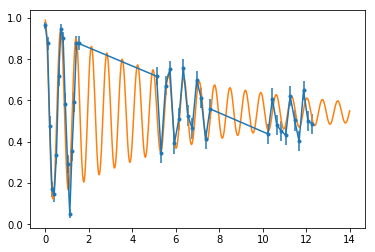

A:0.42,tau:5.65,omega:1.45,bg:0.56


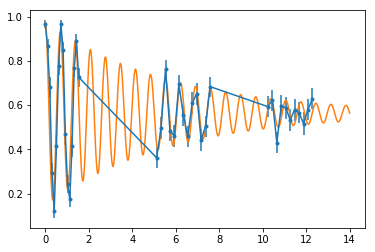

A:0.43,tau:6.11,omega:1.44,bg:0.57


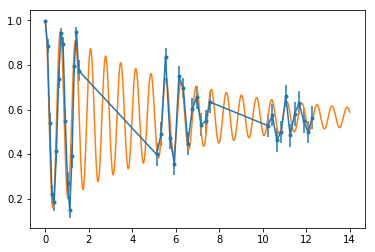

A:0.42,tau:6.43,omega:1.38,bg:0.55


C:\Users\wangy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


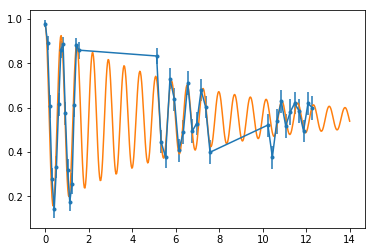

A:0.36,tau:15.46,omega:1.29,bg:0.53


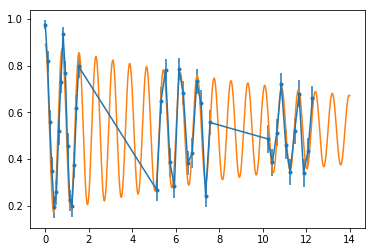

A:0.40,tau:23.36,omega:1.20,bg:0.55


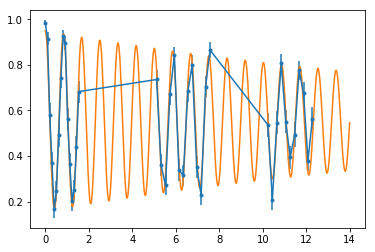

A:0.40,tau:6.85,omega:1.43,bg:0.56


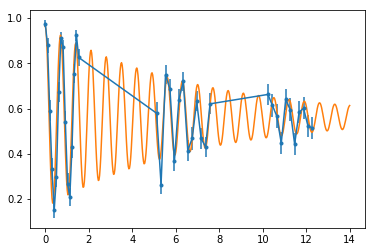

A:0.44,tau:4.39,omega:1.30,bg:0.56


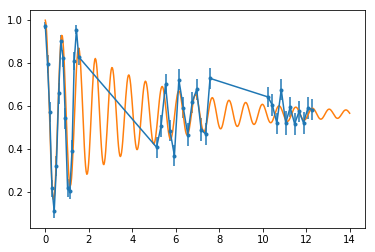

A:0.44,tau:5.48,omega:1.41,bg:0.55


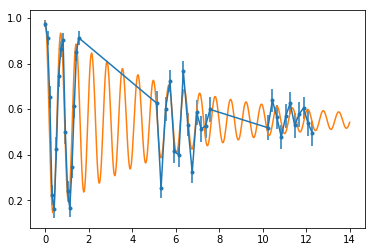

A:0.43,tau:10.14,omega:1.33,bg:0.54


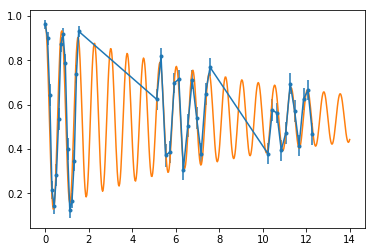

A:0.41,tau:18.54,omega:1.23,bg:0.55


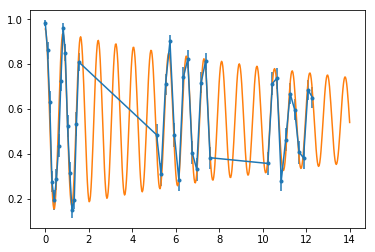

A:0.41,tau:10.64,omega:1.16,bg:0.58


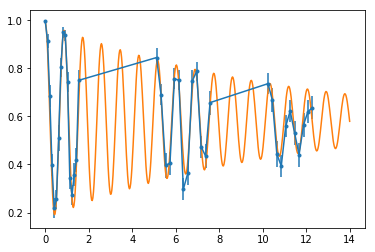

A:0.43,tau:6.23,omega:1.40,bg:0.53


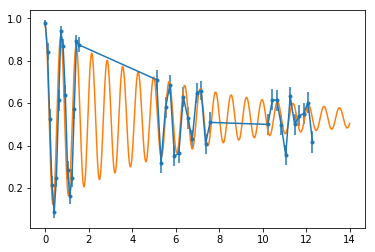

A:0.44,tau:4.02,omega:1.29,bg:0.57


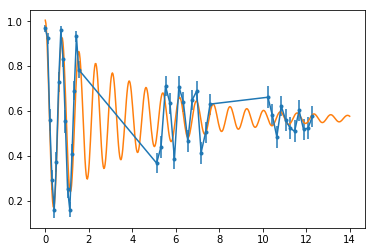

A:0.55,tau:1.77,omega:1.35,bg:0.56


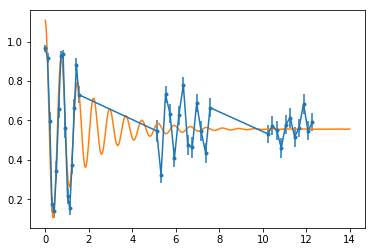

A:0.42,tau:8.11,omega:1.37,bg:0.54


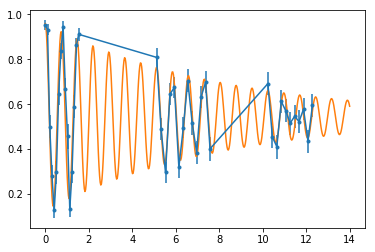

A:0.41,tau:12.14,omega:1.28,bg:0.54


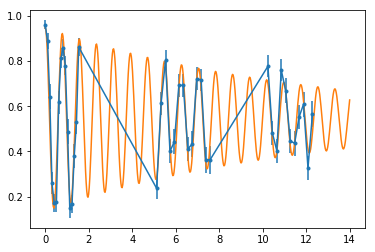

A:0.41,tau:16.83,omega:1.19,bg:0.56


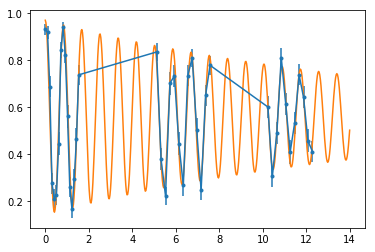

A:0.47,tau:3.71,omega:1.28,bg:0.54


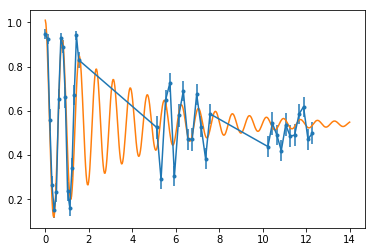

A:0.50,tau:2.93,omega:1.30,bg:0.55


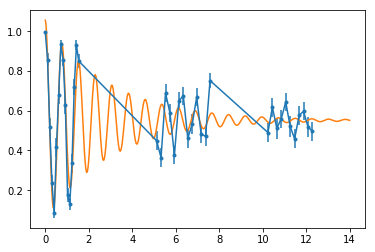

A:0.45,tau:5.83,omega:1.39,bg:0.54


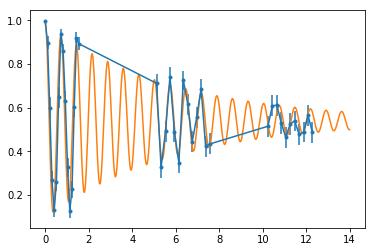

A:0.43,tau:9.22,omega:1.32,bg:0.52


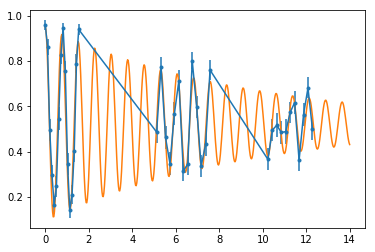

A:0.41,tau:20.58,omega:1.22,bg:0.54


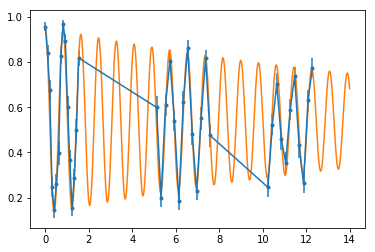

A:0.39,tau:13.27,omega:1.16,bg:0.59


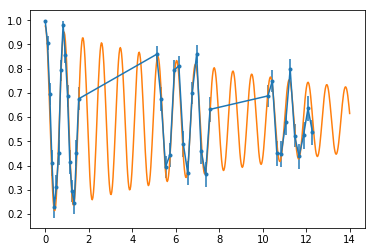

A:0.45,tau:6.07,omega:1.40,bg:0.53


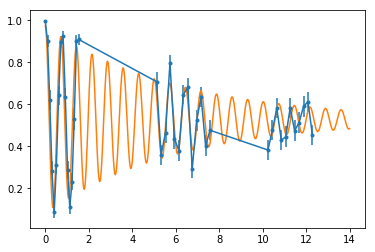

A:0.45,tau:3.98,omega:1.28,bg:0.55


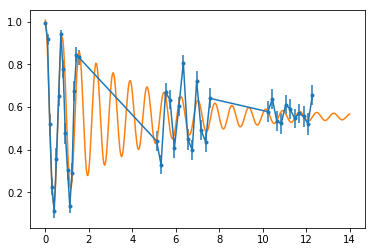

A:0.42,tau:6.70,omega:1.41,bg:0.55


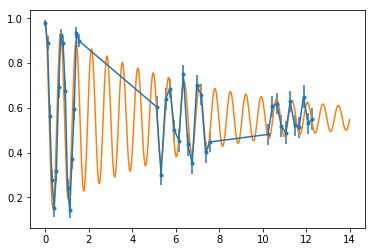

A:0.47,tau:6.50,omega:1.35,bg:0.52


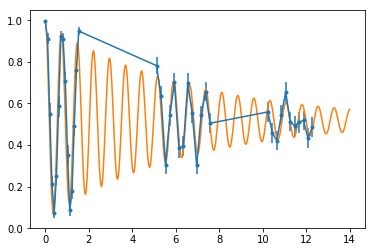

A:0.39,tau:14.21,omega:1.27,bg:0.53


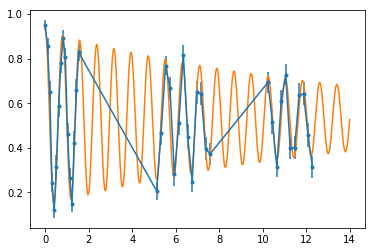

A:0.39,tau:14.24,omega:1.19,bg:0.55


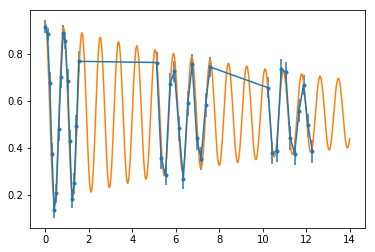

A:0.44,tau:6.36,omega:1.42,bg:0.53


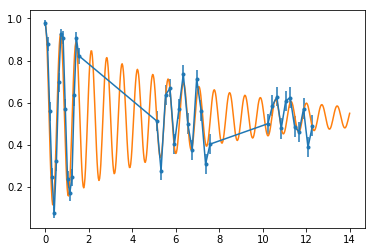

A:0.43,tau:6.84,omega:1.43,bg:0.56


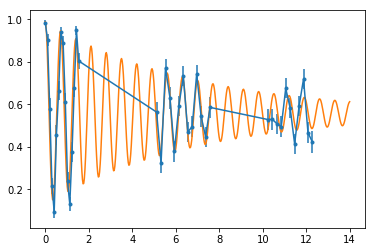

A:0.41,tau:5.85,omega:1.24,bg:0.56


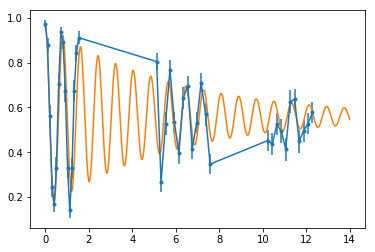

A:0.42,tau:11.15,omega:1.31,bg:0.52


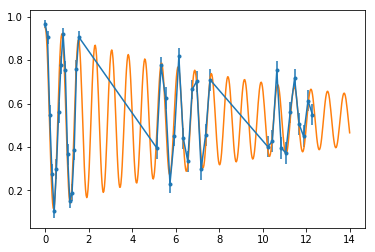

A:0.40,tau:22.32,omega:1.22,bg:0.54


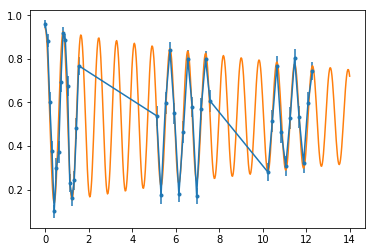

A:0.37,tau:12.23,omega:1.15,bg:0.57


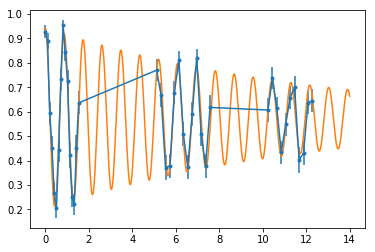

In [7]:
t_list = np.linspace(0,14,500)
omega_list = []
tau_list = []

omega_err_list = []
tau_err_list = []
for i in range(36):
    plt.errorbar(data_yu['t'],data_yu['mean'][i],yerr=data_yu['var'][i],ls='-',marker='.')
    p,perr = curve_fit(func_fit,data_yu['t'],data_yu['mean'][i])
    print ("A:%.2f,tau:%.2f,omega:%.2f,bg:%.2f"%(p[0],p[1],p[2],p[3]))
    tau_list += [p[1]]
    omega_list += [p[2]]
    tau_err_list += [perr[1,1]**0.5]
    omega_err_list += [perr[2,2]**0.5]
    plt.plot(t_list,func_fit(t_list,*p))
    plt.show()

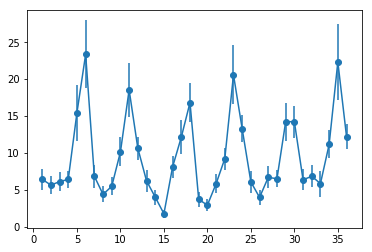

<ErrorbarContainer object of 3 artists>

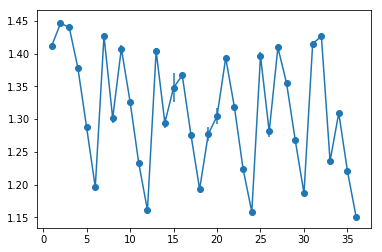

In [8]:
plt.errorbar(range(1,37),tau_list,yerr=tau_err_list,marker='o')
plt.show()
plt.errorbar(range(1,37),omega_list,yerr=omega_err_list,marker='o')

# for i in range(6):
#     plt.axvline(i*6)

(1.15, 1.45)

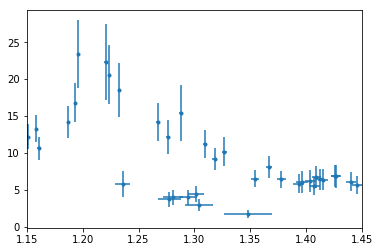

In [9]:
plt.errorbar(omega_list,tau_list,xerr=omega_err_list,yerr=tau_err_list,ls='',marker='.')
plt.xlim([1.15,1.45])

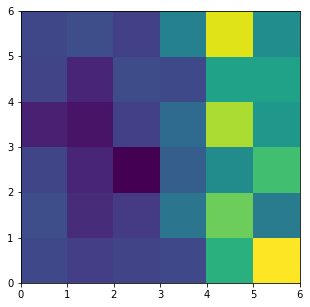

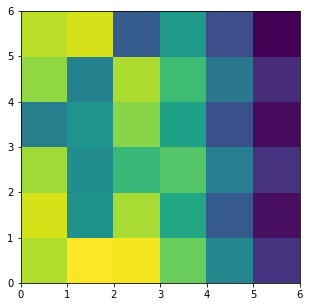

In [10]:
plt.subplots(figsize=(5,5))
plt.pcolor(np.array(tau_list).reshape(6,6))

plt.subplots(figsize=(5,5))
plt.pcolor(np.array(omega_list).reshape(6,6))

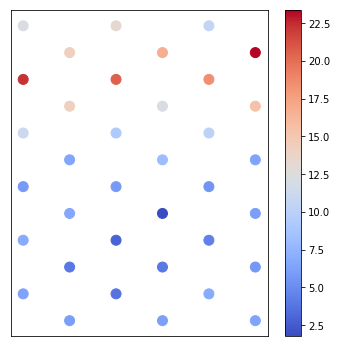

In [12]:
plt.subplots(figsize=(6,6))
x_list = np.kron(-np.arange(6),np.ones(6))*3**0.5/2
y_list = np.kron(np.ones(6),np.arange(6))+np.kron(np.ones(3),np.append(np.zeros(6),np.ones(6)/2))
tau_min = min(tau_list)
tau_max = max(tau_list)
plt.scatter(x_list,y_list,marker='o',s=100,c=tau_list,cmap='coolwarm')
plt.xticks([])
plt.yticks([])
plt.gca().set_aspect(1)
plt.colorbar()